# Calculate numerical value for nv=1

In [3]:
import sys
sys.path.append('C:\\Users\\MHJGuillermo\\PycharmProjects\\Doctorado\\Ising\\Varios_vecinos\\venv\\src')

In [4]:
%pylab inline

from pathlib import Path

import h5py
import numpy as np
import style
from ising.io import read_ising_config
from matplotlib import pyplot, rcParams
from matplotlib.axes import Axes, GridSpec
from matplotlib.figure import Figure
from ruamel.yaml import YAML
from scipy import interpolate as interp
from scipy.optimize import curve_fit
from scipy.signal import savgol_filter
import pandas as pd
import json

import os
import re

yaml = YAML()

Populating the interactive namespace from numpy and matplotlib


Adimensional $$T = k_BT/J$$ and $$f/J$$

In [2]:
def free_energy(T: float,h: float):
    return -T*np.log(np.exp(1/T)*np.cosh(h/T) + np.sqrt(np.exp(2/T)*np.sinh(h/T)**2 + np.exp(-2/T)))

def specific_heat(T: float, h: float):
    epsilon = 0.001
    return -T*(free_energy(T+epsilon,h) - 2*free_energy(T,h) + free_energy(T-epsilon,h))/(epsilon**2)

C_V max.: 0.607135
Temp. at C_V max.: 2.0723058


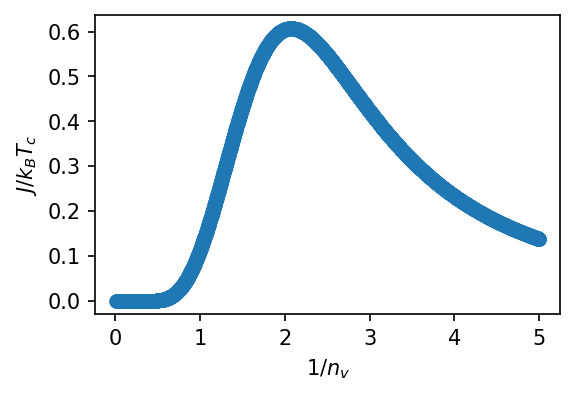

In [9]:
# define the point for graph
x_data = np.linspace(0.01, 5, 2048)
y_data = specific_heat(x_data,1)

fig1: Figure = pyplot.figure(figsize=(4, 9), dpi=150)
grid_spec = GridSpec(3, 1)

# Specific heat subplot.
ax: Axes = fig1.add_subplot(grid_spec[0, 0])

ax.plot(x_data, y_data, marker="o", lw=0)

ax.set_xlabel(r"$1/n_v$")
ax.set_ylabel(r"$J/k_BT_c$")

cv_max_idx = np.argmax(y_data)
temp_cv_max, cv_max = x_data[cv_max_idx], y_data[cv_max_idx]

print(f"C_V max.: {cv_max:.8G}")
print(f"Temp. at C_V max.: {temp_cv_max:.8G}")

pyplot.draw()

In [10]:
1/2.0723058

0.48255426395081263